In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [3]:
ds_data = pd.read_csv("/kaggle/input/data-science-job-salaries/ds_salaries.csv")
ds_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
ds_data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [5]:
print("Work year : " , ds_data['work_year'].unique() , " \n ")
print("Employment Type : ", ds_data['employment_type'].unique(), " \n ")
print("Job Title : ", ds_data['job_title'].unique(), " \n ")
print("Salary Range : $" , ds_data['salary_in_usd'].min() , " to $" , ds_data['salary_in_usd'].max() , " \n ")
print("Employee Residence : ", ds_data['employee_residence'].unique(), " \n ")
print("Company Size : ", ds_data['company_size'].unique(), " \n ")

Work year :  [2020 2021 2022]  
 
Employment Type :  ['FT' 'CT' 'PT' 'FL']  
 
Job Title :  ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Anal

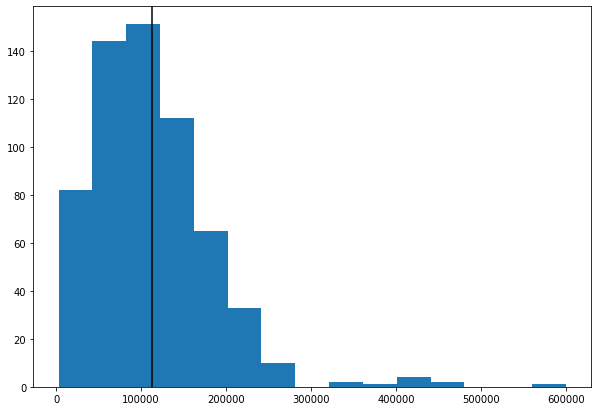

In [6]:
from matplotlib import pyplot as plt
fig , ax = plt.subplots(figsize=(10,7))
ax.hist(ds_data['salary_in_usd'], bins=15)
ax.axvline(ds_data['salary_in_usd'].mean() , c='k')
plt.show()

In [7]:
def getColor(value):
    return (round(value/600000,2), round(abs(1-(value/600000))) , 1)
getColor(400000)

(0.67, 0, 1)

In [31]:
grp_data = ds_data.groupby(['salary_in_usd' , 'job_title']).size().reset_index()
# grp_data=grp_data[-20:]
grp_data['rgb'] = list(map(getColor , list(grp_data['salary_in_usd'])))
grp_data

,salary_in_usd,job_title,0,rgb
0,2859,Data Scientist,1,"(0.0, 1, 1)"
1,4000,Data Engineer,1,"(0.01, 1, 1)"
2,4000,Data Scientist,1,"(0.01, 1, 1)"
3,5409,3D Computer Vision Researcher,1,"(0.01, 1, 1)"
4,5679,Data Scientist,1,"(0.01, 1, 1)"
...,...,...,...,...
494,416000,Principal Data Scientist,1,"(0.69, 0, 1)"
495,423000,Applied Machine Learning Scientist,1,"(0.7, 0, 1)"
496,450000,Financial Data Analyst,1,"(0.75, 0, 1)"
497,450000,Research Scientist,1,"(0.75, 0, 1)"


In [37]:
grp_data = grp_data.sort_values(['job_title' ,'salary_in_usd'])
fields = grp_data.salary_in_usd.unique()
colors = list(map(getColor , fields))
grp_data

,salary_in_usd,job_title,0,rgb
3,5409,3D Computer Vision Researcher,1,"(0.01, 1, 1)"
15,12000,AI Scientist,2,"(0.02, 1, 1)"
24,18053,AI Scientist,1,"(0.03, 1, 1)"
87,45896,AI Scientist,1,"(0.08, 1, 1)"
116,55000,AI Scientist,1,"(0.09, 1, 1)"
...,...,...,...,...
316,120000,Research Scientist,1,"(0.2, 1, 1)"
361,144000,Research Scientist,1,"(0.24, 1, 1)"
436,187442,Research Scientist,1,"(0.31, 1, 1)"
497,450000,Research Scientist,1,"(0.75, 0, 1)"
